In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from functions import visualizeClassificationAreas

# Classification results of the Moons data set.
Xtotal, ytotal = datasets.make_moons(n_samples=200, noise = 0.15)

In [3]:
# split the data set into training and test data sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtotal, ytotal, test_size=0.5)

# create a standard scaler
scaler1=StandardScaler()
XtrainScaled=scaler1.fit_transform(Xtrain)
XtestScaled=scaler1.transform(Xtest) # here we only need to transform

# support vector machines
SVMCLF=SVC(decision_function_shape='ovo')
# logistic regression
LogisticCLF=LogisticRegression(random_state=42)
# random forrest classifier
ForestCLF=RandomForestClassifier(n_estimators=30)

# create a list of classifier tuples
# this list is used to form the voting classifier
# (classifier name, classifier object)
classifierTypeNameInitial=[('SVM',SVMCLF),('LogisticRegression',LogisticCLF),('RandomForest',ForestCLF)]
# here we create the voting classifier
VotingCLF=VotingClassifier(estimators=classifierTypeNameInitial, voting='hard')

# create the final list of tuples of classifiers
classifierTypeNameTotal=classifierTypeNameInitial+[('Voting',VotingCLF)]



In [4]:
# this dictionary is used to store the classification scores
classifierScore={}

# here we iterate through the classifiers and compute the accuracy score
# and store the accuracy store in the list
for nameCLF,CLF in classifierTypeNameTotal:
    CLF.fit(XtrainScaled,Ytrain)
    CLF_prediction=CLF.predict(XtestScaled)
    classifierScore[nameCLF]=accuracy_score(Ytest,CLF_prediction)

classifierScore

{'SVM': 0.95, 'LogisticRegression': 0.82, 'RandomForest': 0.96, 'Voting': 0.93}

d:\Computer\ML\MLBox\ScikitLearn2\functions.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[0].scatter(XtrainSet[ytrainSet == classesNumbers[index1], 0], XtrainSet[ytrainSet == classesNumbers[index1], 1],
d:\Computer\ML\MLBox\ScikitLearn2\functions.py:74: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[1].scatter(XtestSet[ytestSet == classesNumbers[index1], 0], XtestSet[ytestSet == classesNumbers[index1], 1],
d:\Computer\ML\MLBox\ScikitLearn2\functions.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[0].scatter(XtrainSet[ytrainSet 

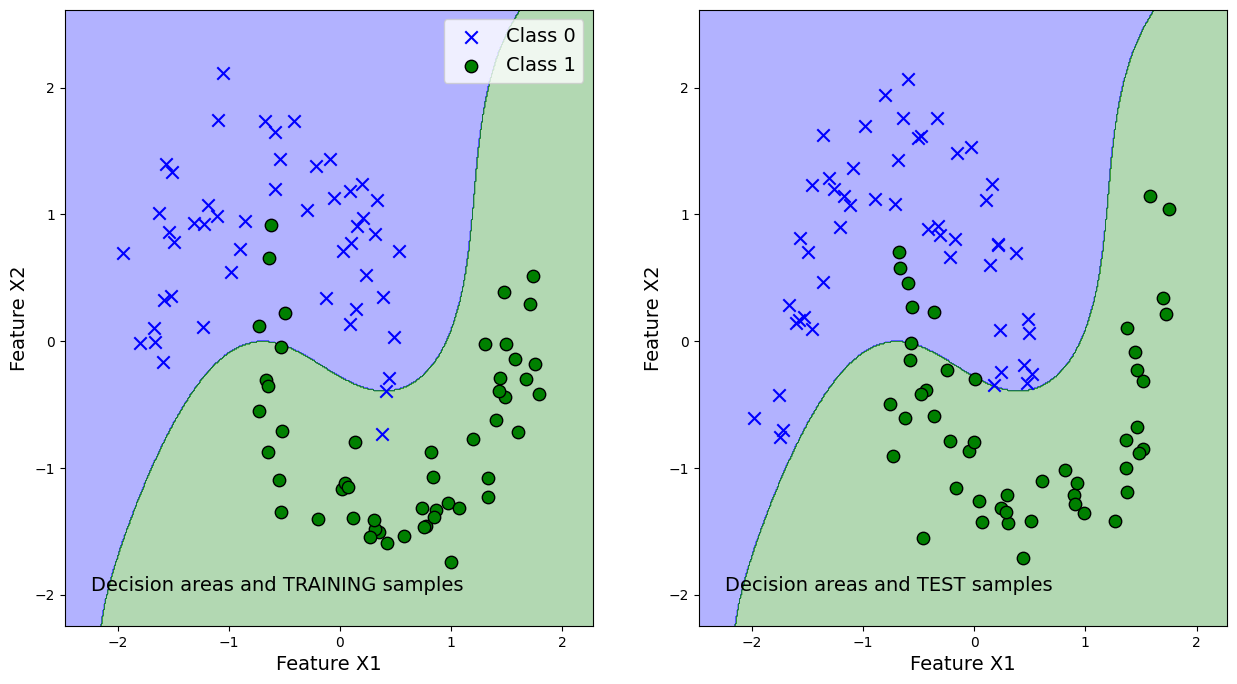

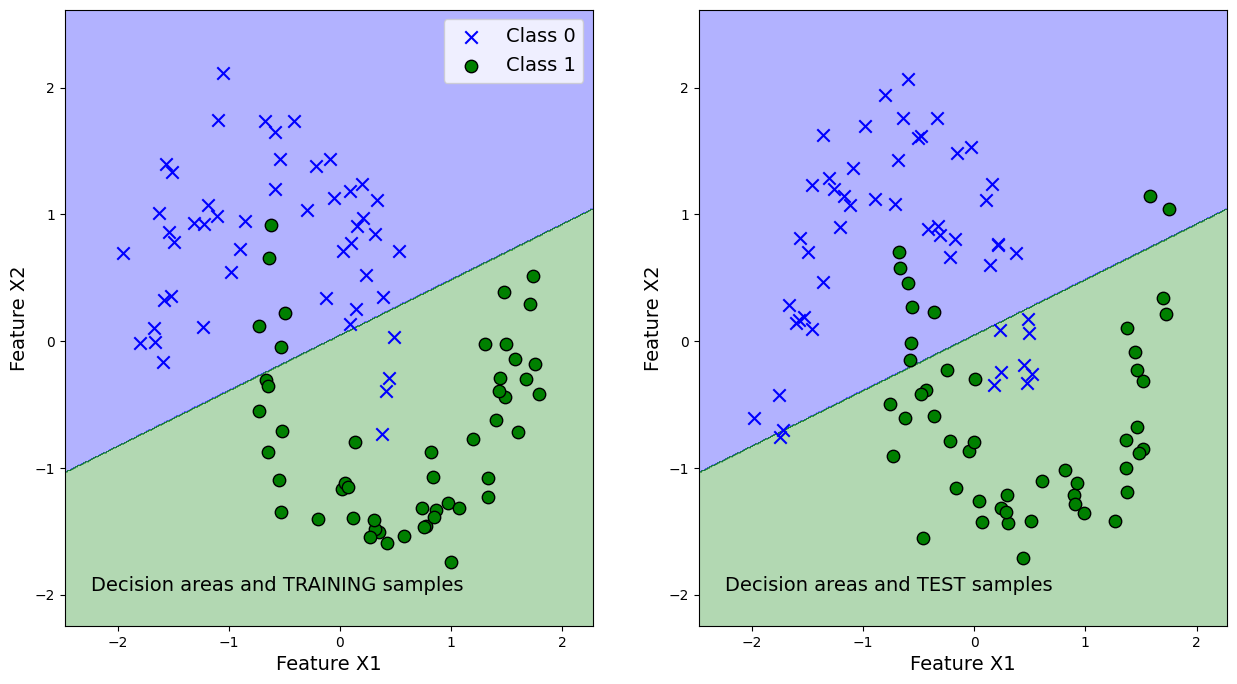

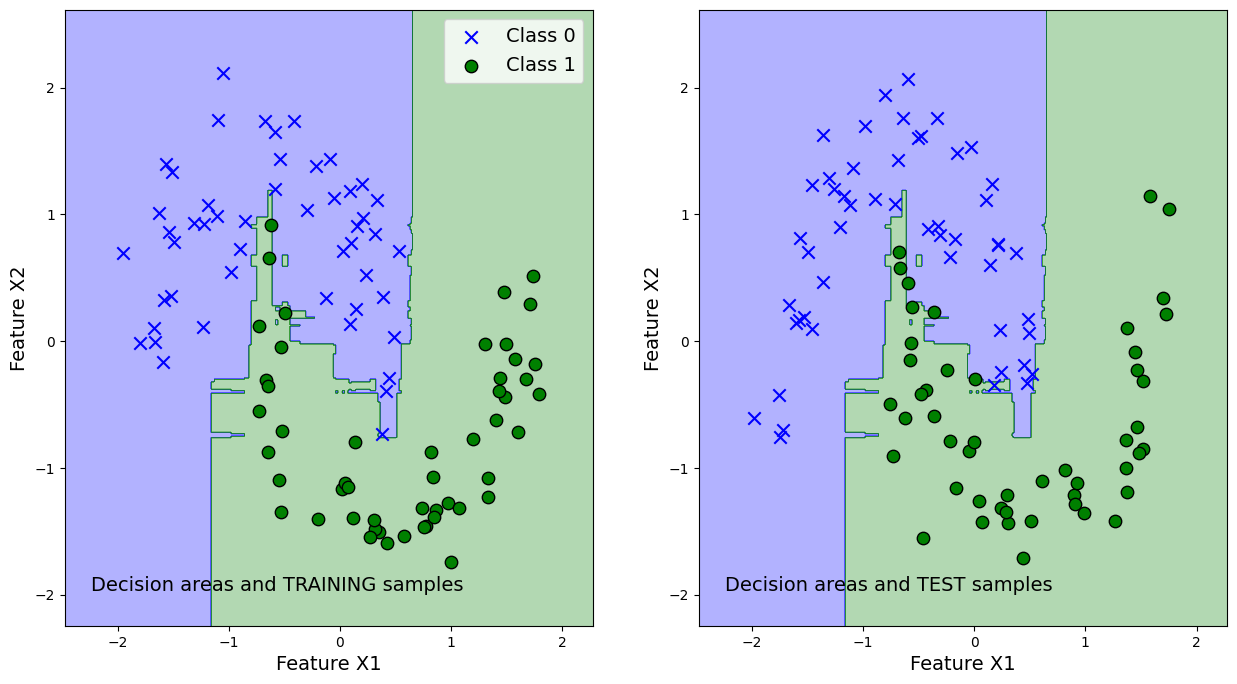

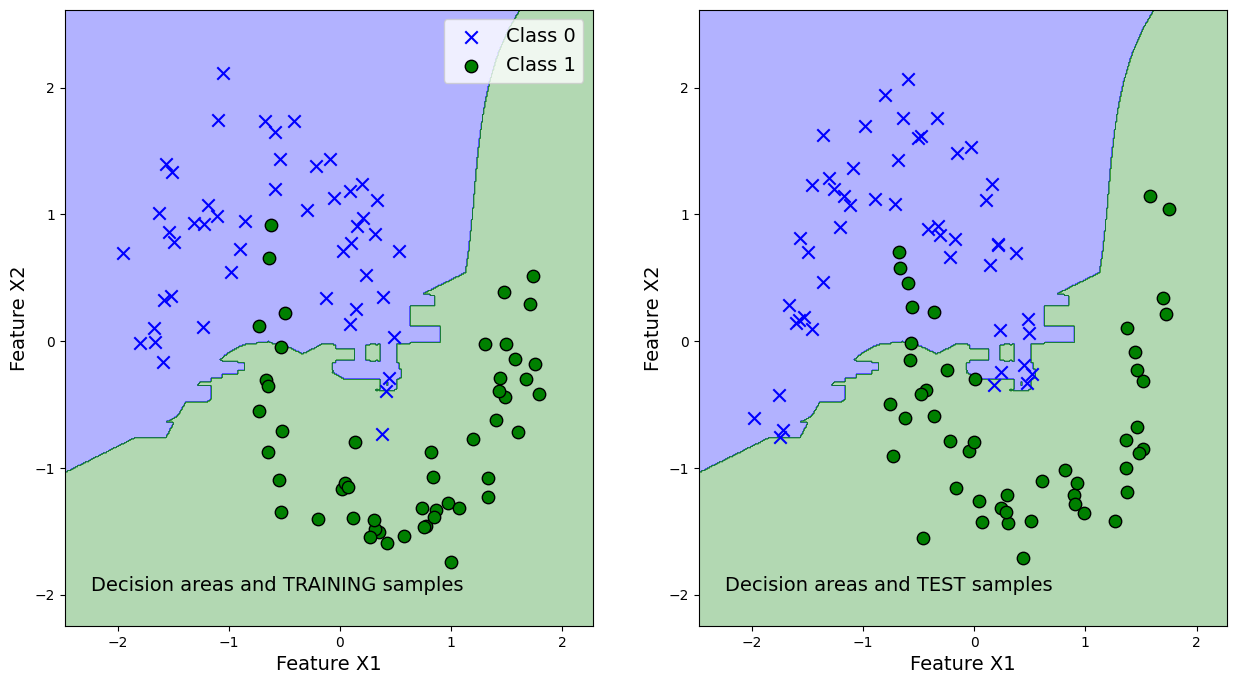

In [5]:
# visualize the classification regions

visualizeClassificationAreas(SVMCLF,XtrainScaled, Ytrain,XtestScaled, Ytest, filename='classification_results_svm.png', plotDensity=0.01 )
visualizeClassificationAreas(LogisticCLF,XtrainScaled, Ytrain,XtestScaled, Ytest, filename='classification_results_logistic.png', plotDensity=0.01 )
visualizeClassificationAreas(ForestCLF,XtrainScaled, Ytrain,XtestScaled, Ytest, filename='classification_results_forest.png', plotDensity=0.01 )
visualizeClassificationAreas(VotingCLF,XtrainScaled, Ytrain,XtestScaled, Ytest, filename='classification_results_voting.png', plotDensity=0.01 )